In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sympy import symbols,diff

In [3]:
x = symbols('x')
fx = x**2 - 10*x + 1
dfx = diff(fx, x,1)
print('一階導數:{}，二階導數:{}'.format(fx,dfx))

一階導數:x**2 - 10*x + 1，二階導數:2*x - 10


In [4]:
eta = 0.1
x_history = []
a = 20
threshold = 1e-5

In [5]:
while True:
    gradient = dfx.evalf(subs = {x:a})
    old = a
    a = a - eta*gradient
    x_history.append(a)
    if abs(fx.evalf(subs = {x:a}) - fx.evalf(subs = {x:old})) < threshold:
        break

In [6]:
plot_x = np.linspace(-10,20,140)
plot_y = np.array([fx.evalf(subs = {x:i}) for i in plot_x])
gradient_y = np.array([fx.evalf(subs = {x:i}) for i in x_history])

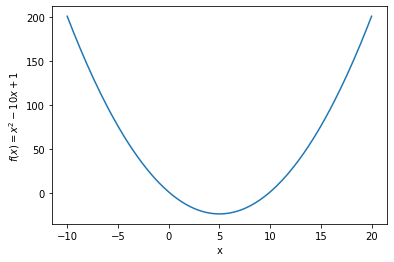

In [7]:
fig = plt.figure()
ims = []
im = plt.plot(plot_x, plot_y)
plt.xlabel("x")
plt.ylabel(r'$f(x) = x^2 - 10x + 1$')
for i in x_history:
    im = plt.plot(i, fx.evalf(subs = {x:i}),color='r',marker='+')
    ims.append(im)
ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=1000)
ani.save("test.gif",writer='pillow')

![title](test.gif)

# 梯度下降Gradient Descent(GD)

In [22]:
def fx(W, X_b, y):
    return sum((y-X_b.dot(W))**2)/len(y)

def dfx(W, X_b, y):
    return X_b.T.dot(X_b.dot(W)-y)*2. / len(y)

In [38]:
def GD(intial_W, X_b, y, eta , n_iters):
    W = intial_W
    i_iter = 0
    loss = []
    while i_iter < n_iters:
        gradient = dfx(W, X_b, y)
        W_old = W
        W = W_old - eta*gradient
        i_iter += 1
        loss.append(fx(W, X_b, y))
    return loss

# 隨機梯度下降 Stochastic Gradient Descent(SGD)
在更新參數的時候 <br>
GD我們是一次用全部訓練集的數據去計算損失函數的梯度就更新一次參數。<br>
SGD就是一次跑一個樣本或是小批次(mini-batch)樣本然後算出一次梯度或是小批次梯度的平均後就更新一次，那這個樣本或是小批次的樣本是隨機抽取的，所以才會稱為隨機梯度下降法。<br>
## SGD缺點
SGD一定有一些缺點，才會有後續的演進，在當下的問題如果學習率太大，容易造成參數更新呈現鋸齒狀的更新，這是很沒有效率的路徑。

In [28]:
def dfx_SGD(W, X_bi, yi):
    return X_bi.T.dot(X_bi.dot(W)-yi)*2.

def SGD(intial_W, X_b, y, eta ,n_iters):
    W = intial_W
    i_iter = 0
    loss = []
    while i_iter < n_iters:
        rand_i = np.random.randint(len(X_b))
        gradient = dfx_SGD(W, X_b[rand_i], y[rand_i])
        W_old = W
        W = W_old - eta*gradient
        i_iter += 1
        loss.append(fx(W, X_b, y))
    return loss

# 小批量隨機梯度下降 Min-Batch Stochastic Gradient Descent

In [40]:
def dfx_mini_batch_SGD(W, X_b_batch, y_batch):
    return X_b_batch.T.dot(X_b_batch.dot(W)-y_batch)*2. / len(y_batch)

def mini_batch_SGD(intial_W, X_b, y, eta, n_iters, batch_size = 128):
    W = intial_W
    i_iter = 0
    loss = []
    while i_iter < n_iters:
        rand_i = [np.random.randint(len(X_b)) for i in range(batch_size)]
        gradient = dfx_mini_batch_SGD(W, X_b[rand_i], y[rand_i])
        W_old = W
        W = W_old - eta*gradient
        i_iter += 1
        loss.append(fx(W, X_b, y))
    return loss

# Momentum
m是momentum項(一般設定為0.9)，主要是用在計算參數更新方向前會考慮前一次參數更新的方向，如果當下梯度方向和歷史參數更新的方向一致，則會增強這個方向的梯度，若當下梯度方向和歷史參數更新的方向不一致，則梯度會衰退。然後每一次對梯度作方向微調。這樣可以增加學習上的穩定性(梯度不更新太快)，這樣可以學習的更快，並且有擺脫局部最佳解的能力。
![title](momentum.png)

In [30]:
def dfx_momentum(W, X_b, y):
    return X_b.T.dot(X_b.dot(W)-y)*2. / len(y)

#m是momentum項(一般設定為0.9)
def momentum(intial_W, X_b, y, eta, n_iters, m = 0.9):
    W = intial_W
    i_iter = 0
    loss = []
    while i_iter < n_iters:
        gradient = dfx_momentum(W, X_b, y)
        W_old = W
        if i_iter == 0:
            v = eta*gradient
        else:
            v = m*v_old + eta*gradient
        W = W_old - v
        v_old = v
        i_iter += 1
        loss.append(fx(W, X_b, y))
    return loss

# Adagrad
![title](adagrad.png)
$\epsilon$是平滑項，主要避免分母為0的問題，一般設定為1e-7。Gt這邊定義是一個對角矩陣，對角線每一個元素是相對應每一個參數梯度的平方和。
![title](Gt.png)
## Adagrad缺點
是在訓練中後段時，有可能因為分母累積越來越大(因為是從第1次梯度到第t次梯度的和)導致梯度趨近於0，如果有設定early stop的，會使得訓練提前結束。

In [31]:
def dfx_adagrad(W, X_b, y):
    return X_b.T.dot(X_b.dot(W)-y)*2. / len(y)

def adagrad(intial_W, X_b, y, eta, n_iters, epsilon = 1e-7):
    W = intial_W
    i_iter = 0
    ada = 0
    loss = []
    while i_iter < n_iters:
        W_old = W
        gt = dfx_adagrad(W, X_b, y)
        ada += gt**2
        W = W_old - gt*eta/(ada**(1/2)+epsilon)
        i_iter += 1
        loss.append(fx(W, X_b, y))
    return loss

# RMSProp
和Adagrad一樣是自適應的方法，但Adagrad的分母是從第1次梯度到第t次梯度的和，所以和可能過大，兒RMSprop則是算對應的平均值，因此可以緩解Adagrad學習率下降過快的問題。
![title](RMSProp.png)
E[ ]在統計上就是取期望值，所以是取$g_i^2$的期望值，白話說就是他的平均數。$\rho$是過去t-1時間的梯度平均數的權重，一般建議設成0.9。

In [32]:
def dfx_RMSProp(W, X_b, y):
    return X_b.T.dot(X_b.dot(W)-y)*2. / len(y)

def RMSProp(intial_W, X_b, y, eta, n_iters, rho = 0.9, epsilon = 1e-7):
    W = intial_W
    i_iter = 0
    a1 = 0
    loss = []
    while i_iter < n_iters:
        W_old = W
        gt = dfx_RMSProp(W, X_b, y)
        if i_iter == 0:
            a2 = (1-rho)*gt**2
        else:
            a2 = rho*a1/i_iter + (1-rho)*gt**2
        a1 += gt**2
        W = W_old - gt*eta/(a2**(1/2)+epsilon)
        i_iter += 1
        loss.append(fx(W, X_b, y))
    return loss

# Adam
Adam全名Adaptive Moment Estimation。剛剛介紹的Momentum是「計算參數更新方向前會考慮前一次參數更新的方向」， RMSprop則是「在學習率上依據梯度的大小對學習率進行加強或是衰減」。<br>
## Adam則是兩者合併加強版本(Momentum+RMSprop+各自做偏差的修正)。
![title](adam1.png)
$m_t$和$v_t$分別是梯度的一階動差函數和二階動差函數(非去中心化)。因為$m_t$和$v_t$初始設定是全為0的向量，Adam的作者發現算法偏量很容易區近於0，因此他們提出修正項，去消除這些偏量
![title](adam2.png)
## Adam更新的準則:
![title](adam3.png)
作者有建議預設值$\beta_1$=0.9, $\beta_2$=0.999, $\epsilon$=10^(-8)。

In [33]:
def dfx_Adam(W, X_b, y):
    return X_b.T.dot(X_b.dot(W)-y)*2. / len(y)

def Adam(intial_W, X_b, y, eta, n_iters, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8):
    W = intial_W
    i_iter = 0
    mt = 0
    vt = 0
    loss = []
    while i_iter < n_iters:
        W_old = W
        gt = dfx_Adam(W, X_b, y)
        mt = beta1*mt + (1-beta1)*gt
        vt = beta2*vt + (1-beta2)*gt**2
        mt_hat = mt/(1-beta1**(i_iter+1))
        vt_hat = vt/(1-beta2**(i_iter+1))
        W = W_old - mt_hat*eta/(vt_hat**(1/2)+epsilon)
        i_iter += 1
        loss.append(fx(W, X_b, y))
    return loss

In [34]:
m = 100000
x = np.random.normal(size = m)
X = x.reshape(-1,1)
y = 4. * x + 3. +np.random.normal(0,3,size = m)
X_b = np.hstack([np.ones((len(x),1)), X])
intial_W = np.zeros(X_b.shape[1])

In [41]:
a1 = GD(intial_W, X_b, y, 0.01, 1e3)
a2 = SGD(intial_W, X_b, y, 0.01, 1e3)
a3 = mini_batch_SGD(intial_W, X_b, y, 0.01, 1e3, batch_size = 128)
a4 = momentum(intial_W, X_b, y, 0.01, 1e3)
a5 = adagrad(intial_W, X_b, y, 0.01, 1e3)
a6 = RMSProp(intial_W, X_b, y, 0.01, 1e3)
a7 = Adam(intial_W, X_b, y, 0.01, 1e3)

Text(0, 0.5, 'Loss')

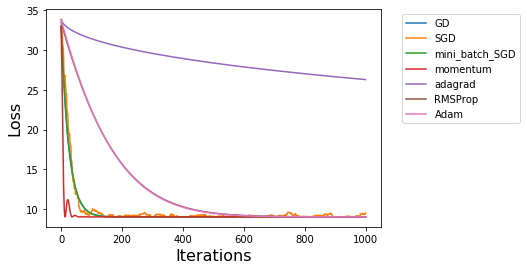

In [49]:
plt.plot(range(1000), a1, label = 'GD')
plt.plot(range(1000), a2, label = 'SGD')
plt.plot(range(1000), a3, label = 'mini_batch_SGD')
plt.plot(range(1000), a4, label = 'momentum')
plt.plot(range(1000), a5, label = 'adagrad')
plt.plot(range(1000), a6, label = 'RMSProp')
plt.plot(range(1000), a7, label = 'Adam')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Iterations", fontsize=16)
plt.ylabel("Loss", fontsize=16)